In [1]:
### Imports:

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 8, 8
import scipy as sp
import scipy.optimize
import scipy.stats as stat

In [2]:
### Notes
# The distance between the two lenses is 35.7 cm 

In [3]:
### Radius measurement 
rarray = np.array([170 + 1916 + 1556, 1555 + 2000 + 45, 166 + 1915 + 1554])
r_mean = (rarray[0]+rarray[1]+rarray[2])/3
r_stdev = np.std(rarray)
print (f"The radius between the boom and the micrometer station is {r_mean} ± {r_stdev}")


The radius between the boom and the micrometer station is 3625.6666666666665 ± 18.372685039360892


In [4]:
### Reading the data files 

data1 = np.loadtxt("trial1.txt", dtype = float)
print (f"{len(data1)} data points were recorded for trial 1.")
time1 = np.delete(data1, 1, 1).flatten()
position1 = np.delete(data1, 0, 1).flatten()
x1 = time1/60
y1 = position1/1000

data2 = np.loadtxt("trial2.txt", dtype = float)
print (f"{len(data2)} data points were recorded for trial 2.")
time2 = np.delete(data2, 1, 1).flatten()
position2 = np.delete(data2, 0, 1).flatten()
x2 = time2/60
y2 = position2/1000

data3 = np.loadtxt("trial3.txt", dtype = float)
print (f"{len(data3)} data points were recorded for trial 3.")
time3 = np.delete(data3, 1, 1).flatten()
position3 = np.delete(data3, 0, 1).flatten()
x3 = time2/60
y3 = position2/1000

1801 data points were recorded for trial 1.
1801 data points were recorded for trial 2.
1801 data points were recorded for trial 3.


In [18]:
### Calculating the deviation angle for the first trial

# center, left, right 
measureb1 = np.array([-9.052, -7.407, -10.152])
measurea1 = np.array([-0.672, -2.213, 0.523])
def finalmeasurement(a, b):
    measureb = a[0]
    measurea = b[0]
    measureb_stdev = np.std (a)
    measurea_stdev = np.std(b)
    measured_diff = np.absolute(measurea-measureb)
    measured_diff_stdev = np.sqrt(measureb_stdev**2+measurea_stdev**2)
    return measured_diff, measured_diff_stdev
measurement1, measurement_uncert1 = finalmeasurement(measurea1, measureb1)    

R1 = r_mean
R_uncert1 = r_stdev
angle1 = measurement1/(4*R1)
angle_uncert1 = np.sqrt((measurement_uncert1/(4*R1))**2 + ((measurement1*R_uncert1)/(4*R1**2))**2)
print (f"Delta X is {measurement1} ± {measurement_uncert1} mm")
print (f"The deviation angle is {angle1} ± {angle_uncert1} radians") 
print (f"The deviation angle is {angle1*(180/np.pi)} ± {angle_uncert1*(180/np.pi)} degrees") 

Delta X is 8.379999999999999 ± 1.5895300493472204 mm
The deviation angle is 0.0005778247678587846 ± 0.00010964171032988281 radians
The deviation angle is 0.0331069204964349 ± 0.0062820072604982055 degrees


In [19]:
### Calculating the deviation angle for the second trial

# center, left, right 
measureb2 = np.array([-0.657, 0.525, -2.549])
measurea2 = np.array([-9.620, -7.141, -11.523])
def finalmeasurement(a, b):
    measureb = a[0]
    measurea = b[0]
    measureb_stdev = np.std (a)
    measurea_stdev = np.std(b)
    measured_diff = np.absolute(measurea-measureb)
    measured_diff_stdev = np.sqrt(measureb_stdev**2+measurea_stdev**2)
    return measured_diff, measured_diff_stdev
measurement2, measurement_uncert2 = finalmeasurement(measurea2, measureb2)    

R2 = r_mean
R_uncert2 = r_stdev
angle2 = measurement2/(4*R2)
angle_uncert2 = np.sqrt((measurement_uncert2/(4*R2))**2 + ((measurement2*R_uncert2)/(4*R2**2))**2)
print (f"Delta X is {measurement2} ± {measurement_uncert2} mm")
print (f"The deviation angle is {angle2} ± {angle_uncert2} radians") 
print (f"The deviation angle is {angle2*(180/np.pi)} ± {angle_uncert2*(180/np.pi)} degrees") 

Delta X is 8.963 ± 2.195830341553939 mm
The deviation angle is 0.0006180242713983635 ± 0.0001514411156906679 radians
The deviation angle is 0.035410182387773985 ± 0.0086769367738277 degrees


In [20]:
### Calculating the deviation angle for the third trial

# center, left, right 
measureb3 = np.array([-2.077, 0.142,  -4.848])
measurea3 = np.array([-10.289, -8.959, -11.727])
def finalmeasurement(a, b):
    measureb = a[0]
    measurea = b[0]
    measureb_stdev = np.std (a)
    measurea_stdev = np.std(b)
    measured_diff = np.absolute(measurea-measureb)
    measured_diff_stdev = np.sqrt(measureb_stdev**2+measurea_stdev**2)
    return measured_diff, measured_diff_stdev
measurement3, measurement_uncert3 = finalmeasurement(measurea3, measureb3)    

R3 = r_mean
R_uncert3 = r_stdev
angle3 = measurement3/(4*R3)
angle_uncert3 = np.sqrt((measurement_uncert3/(4*R3))**2 + ((measurement3*R_uncert3)/(4*R3**2))**2)
print (f"Delta X is {measurement3} ± {measurement_uncert3} mm")
print (f"The deviation angle is {angle3} ± {angle_uncert3} radians") 
print (f"The deviation angle is {angle3*(180/np.pi)} ± {angle_uncert3*(180/np.pi)} degrees") 

Delta X is 8.212 ± 2.3333588093847317 mm
The deviation angle is 0.0005662406913671049 ± 0.00016091729221571542 radians
The deviation angle is 0.03244320180390494 ± 0.009219881694633869 degrees


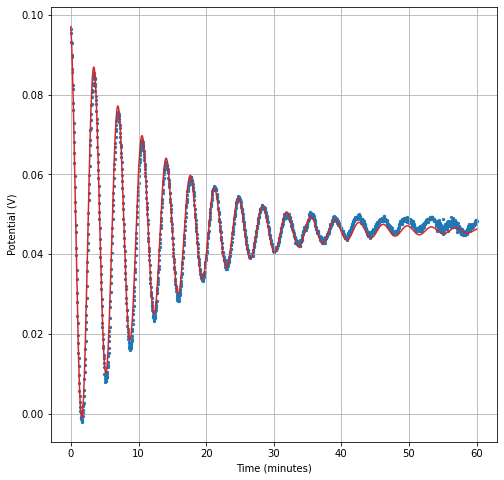

9 regions were examined
The damped angular frequency is 1.7623488983046653 ± 0.2888183911152793 radians
The period is 217.3333333333333 ± 9.42809041582064 seconds


In [8]:
### Fitting, making a plot, and calculating the period for the first trial

function1 = lambda time, deviation, amplitude, damping, angfrequency, phase: deviation + amplitude * np.exp(-damping * time) * np.cos((angfrequency * time) + phase)
fig1, ax1 = plt.subplots()
ax1.scatter(x1, y1, s = 5)
params1, points1 = scipy.optimize.curve_fit(function1, x1, y1, p0 = None, absolute_sigma = True)
ax1.plot(x1, params1[0] + params1[1] * np.exp(-params1[2] * x1) * np.cos((params1[3] * x1) + params1[4]), color = "C3")
plt.xlabel("Time (minutes)")
plt.ylabel ("Potential (V)")
plt.grid(True)
plt.show()

# fit calculating constants and their uncertainties 
covdiag1 = np.diag(points1)
omega1 = params1[3]
omega1_uncert = np.sqrt(covdiag1[3])
# period1 = ((2*np.pi)/omega1) * 60
# period_uncert1 = ((2*np.pi*omega1_uncert)/(omega1**2))*60

# calculating period with for-loop fun
regionlength1 = 106

regionmin1 = 47
regionmax1 = regionmin1 + regionlength1

regionsexamined1 = 0
periods1 = np.array([])
for i in range (len(y1)):
    if regionmax1 > regionlength1 * 10:
        break
    min1 = np.argmin(y1[regionmin1:regionmax1])
    max1 = np.argmax (y1[regionmin1:regionmax1])
    period1 = 2 * np.absolute(x1[min1]-x1[max1])
    periods1 = np.append(periods1, period1)
    regionmin1 += regionlength1
    regionmax1 += regionlength1
    regionsexamined1 += 1
    
period1 = 1/regionsexamined1*np.sum(periods1) * 60
period_uncert1 = np.std(periods1) * 60

# printing everything out
print (f"{regionsexamined1} regions were examined")
print (f"The damped angular frequency is {omega1} ± {omega1_uncert} radians")
print (f"The period is {period1} ± {period_uncert1} seconds")


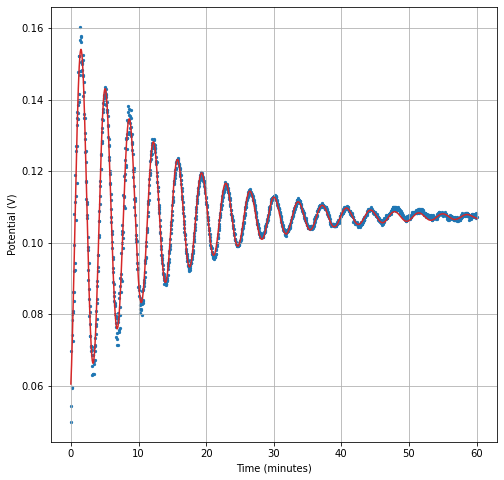

9 regions were examined
The damped angular frequency is 1.761546179326418 ± 0.2841876533265497 radians
The period is 215.5555555555555 ± 18.421672689833528 seconds


In [9]:
### Fitting, making a plot, and calculating the period for the second trial

function2 = lambda time, deviation, amplitude, damping, angfrequency, phase: deviation + amplitude * np.exp(-damping * time) * np.cos((angfrequency * time) + phase)
fig2, ax2 = plt.subplots()
ax2.scatter(x2, y2, s = 5)
params2, points2 = scipy.optimize.curve_fit(function2, x2, y2, p0 = None, absolute_sigma = True)
ax2.plot(x2, params2[0] + params2[1] * np.exp(-params2[2] * x2) * np.cos((params2[3] * x2) + params2[4]), color = "C3")
plt.xlabel("Time (minutes)")
plt.ylabel ("Potential (V)")
plt.grid(True)
plt.show()

# fit calculating constants and their uncertainties 
covdiag2 = np.diag(points2)
omega2 = params2[3]
omega2_uncert = np.sqrt(covdiag2[3])
# period2 = ((2*np.pi)/omega2) * 60
# period_uncert2 = ((2*np.pi*omega2_uncert)/(omega2**2))*60

# calculating period with for-loop fun
regionlength2 = 106

regionmin2 = 40
regionmax2 = regionmin2 + regionlength2
regionsexamined2 = 0
periods2 = np.array([])
for i in range (len(y2)):
    if regionmax2 > regionlength2 * 10:
        break
    min2 = np.argmin(y2[regionmin2:regionmax2])
    max2 = np.argmax (y2[regionmin2:regionmax2])
    period2 = 2 * np.absolute(x2[min2]-x2[max2])
    periods2 = np.append(periods2, period2)
    regionmin2 += regionlength2
    regionmax2 += regionlength2
    regionsexamined2 += 1
    
period2 = 1/regionsexamined2*np.sum(periods2) * 60
period_uncert2 = np.std(periods2) * 60

# printing everything out
print (f"{regionsexamined2} regions were examined")
print (f"The damped angular frequency is {omega2} ± {omega2_uncert} radians")
print (f"The period is {period2} ± {period_uncert2} seconds")


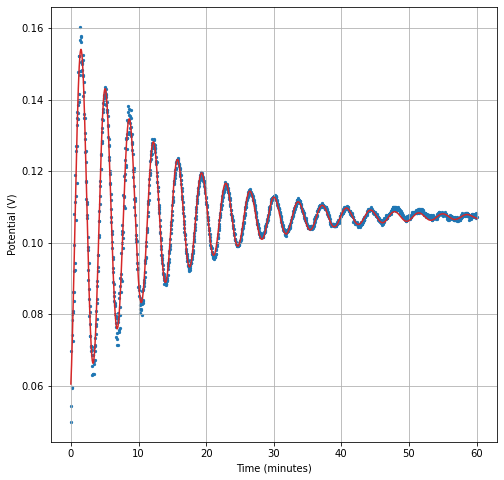

9 regions were examined
The damped angular frequency is 1.761546179326418 ± 0.2841876533265497 radians
The period is 215.5555555555555 ± 18.421672689833514 seconds


In [10]:
### Fitting, making a plot, and calculating the period for the third trial

function3 = lambda time, deviation, amplitude, damping, angfrequency, phase: deviation + amplitude * np.exp(-damping * time) * np.cos((angfrequency * time) + phase)
fig3, ax3 = plt.subplots()
ax3.scatter(x3, y3, s = 5)
params3, points3 = scipy.optimize.curve_fit(function3, x3, y3, p0 = None, absolute_sigma = True)
ax3.plot(x3, params3[0] + params3[1] * np.exp(-params3[2] * x3) * np.cos((params3[3] * x3) + params3[4]), color = "C3")
plt.xlabel("Time (minutes)")
plt.ylabel ("Potential (V)")
plt.grid(True)
plt.show()

# fit calculating constants and their uncertainties 
covdiag3 = np.diag(points3)
omega3 = params3[3]
omega3_uncert = np.sqrt(covdiag3[3])
# period3 = ((2*np.pi)/omega3) * 60
# period_uncert3 = ((2*np.pi*omega3_uncert)/(omega3**2))*60

# calculating period with for-loop fun
regionlength3 = 106

regionmin3 = 30
regionmax3 = regionmin3 + regionlength3
regionsexamined3 = 0
periods3 = np.array([])
for i in range (len(y3)):
    if regionmax3 > regionlength3 * 10:
        break
    min3 = np.argmin(y3[regionmin3:regionmax3])
    max3 = np.argmax (y3[regionmin3:regionmax3])
    period3 = 2 * np.absolute(x3[min3]-x3[max3])
    periods3 = np.append(periods3, period3)
    regionmin3 += regionlength3
    regionmax3 += regionlength3
    regionsexamined3 += 1
    
period3 = 1/regionsexamined3*np.sum(periods3) * 60
period_uncert3 = np.std(periods3) * 60

# printing everything out
print (f"{regionsexamined3} regions were examined")
print (f"The damped angular frequency is {omega3} ± {omega3_uncert} radians")
print (f"The period is {period3} ± {period_uncert3} seconds")

In [11]:
### Calculating G for the first trial
R = 44.9*0.001 #m
d = 66.56*0.001 #m
M = 917*0.001 #kg
G1 = (((2*np.pi/period1)**2)*(R**2)*d*angle1)/M
G_uncert1 = ((4*(np.pi**2)*d*(R**2))/((period1**2)*M))*np.sqrt(((2*angle1*period_uncert1)/period1)**2 + angle_uncert1**2)
print (f"G is equal to {G1} ± {G_uncert1} m^3/kg*s^2")


G is equal to 7.06707772516181e-11 ± 1.474502674659037e-11 m^3/kg*s^2


In [12]:
### Calculating G for the second trial
R = 44.9*0.001 #m
d = 66.56*0.001 #m
M = 917*0.001 #kg
G2 = (((2*np.pi/period2)**2)*(R**2)*d*angle2)/M
G_uncert2 = ((4*(np.pi**2)*d*(R**2))/((period2**2)*M))*np.sqrt(((2*angle2*period_uncert2)/period2)**2 + angle_uncert2**2)
print (f"G is equal to {G2} ± {G_uncert2} m^3/kg*s^2")

G is equal to 7.683931536040203e-11 ± 2.29567712064466e-11 m^3/kg*s^2


In [13]:
### Calculating G for the third trial
R = 44.9*0.001 #m
d = 66.56*0.001 #m
M = 917*0.001 #kg
G3 = (((2*np.pi/period3)**2)*(R**2)*d*angle3)/M
G_uncert3 = ((4*(np.pi**2)*d*(R**2))/((period3**2)*M))*np.sqrt(((2*angle3*period_uncert3)/period3)**2 + angle_uncert3**2)
print (f"G is equal to {G3} ± {G_uncert3} m^3/kg*s^2")

G is equal to 7.040103288403677e-11 ± 2.3346820802290184e-11 m^3/kg*s^2


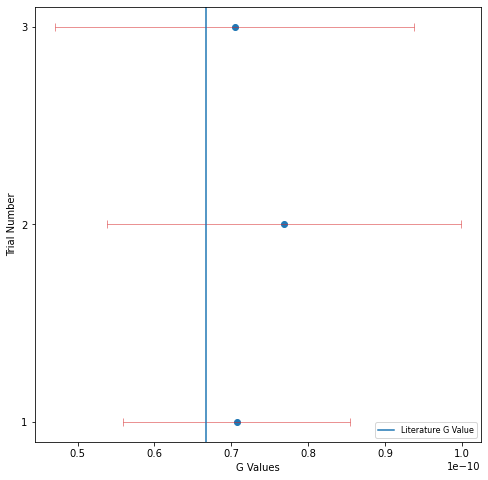

In [17]:
### Plotting the G values
G_lit = 6.67430e-11
Gvalues = np.array([G1, G2, G3])
G_errors = np.array([G_uncert1, G_uncert2, G_uncert3])
fig4, ax4 = plt.subplots()
Gnumber = np.array([1,2,3])
ax4.scatter(Gvalues, Gnumber)
ax4.errorbar(Gvalues, Gnumber, xerr = G_errors, capsize=4, ecolor='C3', elinewidth=0.5, markeredgewidth=0.5,ls='None')
ax4.axvline(G_lit, label="Literature G Value")
plt.yticks([1,2,3])
plt.xlabel("G Values")
plt.ylabel("Trial Number")
plt.legend(loc = 'lower right',fontsize = 8)
plt.show()


In [15]:
### Weighted Average and two-tailed Gaussian p-value calculation

weights = np.sum(1 / G_errors)
G_waverage = (1/weights)*np.sum(Gvalues / G_errors)
G_waverage_STD = np.sqrt(1/np.sum(1/(G_errors**2)))
Zscore = (G_lit - G_waverage)/G_waverage_STD
cdf = sp.stats.norm.cdf(Zscore,0,1)
if cdf>0.5:
    pvalue_2t = 2*(1-cdf)
else :
    pvalue_2t=2*(cdf)

print(f"G weighted average = {G_waverage} ± {G_waverage_STD}")
print('Z score = ',Zscore)
print (f"CDF = {cdf}")
print (f"two tailed p-value = {pvalue_2t}")

G weighted average = 7.233827754003118e-11 ± 1.095560391008009e-11
Z score =  -0.5107228762517653
CDF = 0.3047725599100993
two tailed p-value = 0.6095451198201987
